## Assignment 2: Web scraping of Craiglists

Take the code from class as a starting point. Use it to create a `DataFrame` of the first page of posts for LA housing, with the following fields:
* price
* bedrooms
* sqft
* neighborhood
* url
* title

Put it in a function. For now, the function won't take any arguments, but you'll change that shortly.

In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def getPosts():
    url = 'https://losangeles.craigslist.org/search/lac/hhh'
    r = requests.get(url)
    # the rest of your code goes here, and should create a dataframe called df
    
    return df
    
    
    
### BEGIN SOLUTION
# This is the same code from class, except that we extract the number of bedrooms and square feet
# and deal with exceptions (normally missing fields)
# note that I went for the try...except route, but I made this specific to each field
# so if it fails on one (e.g. price), it populates that variable as None, but retains the rest of the data from that post

def getPosts():
    url = 'https://losangeles.craigslist.org/search/lac/hhh'
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    posts = soup.find_all('li', class_= 'result-row')
    
    postList = [] # empty list that we can add to
    for post in posts:
        # temporary variables
        try:
            price = post.find('span', class_= 'result-price').text
        except:
            price = None
        try:
            neighborhood = post.find('span', class_= 'result-hood').text
        except:
            neighborhood = None
        try:
            housing = post.find('span', class_= 'housing').text
            housinglist = housing.split()
            bedrooms, sqft = None, None # so that these variables exist, even if we don't find them
            for h in housinglist:
                if 'br' in h:
                    bedrooms = h.replace('br', '')
                elif 'ft2' in h:
                    sqft = h.replace('ft2','')
        except:
            bedrooms, sqft = None, None
            
        # these fields are always present, so no need for try...except
        title = post.find('a', class_= 'result-title').text
        url = post.find('a', class_= 'result-title')['href']

        # now put them in the dictionary, and append to our list
        postList.append({'price': price, 'neighborhood':neighborhood, 
                         'bedrooms':bedrooms, 'sqft':sqft, 'title':title, 'url':url})
    df = pd.DataFrame(postList)
    return df

### END SOLUTION

In [29]:
# Autograding tests - do not edit
df = getPosts()
assert len(df) == 120
assert 'bedrooms' in df.columns and 'sqft' in df.columns and 'url' in df.columns
assert df.bedrooms.astype(float).sum() >0

Adapt your function so that it also adds a boolean (True/False) field, `noparking`, that indicates whether the listing includes parking.

*Hint: For each post, you'll need to request the full webpage. [Have a look at these examples](https://losangeles.craigslist.org/search/hhh?availabilityMode=0&parking=7) to see what a post with "no parking" looks like—bring one or two into Python using `requests`. You shouldn't need to parse with `BeautifulSoup` in this instance.*

*Hint: You might need to slow down your loop to keep the site happy. For example, adding `time.sleep(1)` induces a 1-second delay.*



In [30]:
import time

def getPosts():
    url = 'https://losangeles.craigslist.org/search/lac/hhh'
    r = requests.get(url)
    # the rest of your code goes here, and should create a dataframe called df
    
    return df
    
    
    
### BEGIN SOLUTION
# This is the same code as above
# with the addition of the noparking field

def getPosts():
    url = 'https://losangeles.craigslist.org/search/lac/hhh'
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    posts = soup.find_all('li', class_= 'result-row')
    
    postList = [] # empty list that we can add to
    for post in posts:
        # temporary variables
        try:
            price = post.find('span', class_= 'result-price').text
        except:
            price = None
        try:
            neighborhood = post.find('span', class_= 'result-hood').text
        except:
            neighborhood = None
        try:
            housing = post.find('span', class_= 'housing').text
            housinglist = housing.split()
            bedrooms, sqft = None, None # so that these variables exist, even if we don't find them
            for h in housinglist:
                if 'br' in h:
                    bedrooms = h.replace('br', '')
                elif 'ft2' in h:
                    sqft = h.replace('ft2','')
        except:
            bedrooms, sqft = None, None
            
        # these fields are always present, so no need for try...except
        title = post.find('a', class_= 'result-title').text
        url = post.find('a', class_= 'result-title')['href']
        
        # get the underlying webpage
        txt = requests.get(url).text
        if 'no parking' in txt.lower():
            noparking = True
        else:
            noparking = False

        # now put them in the dictionary, and append to our list
        postList.append({'price': price, 'neighborhood':neighborhood, 
                         'bedrooms':bedrooms, 'sqft':sqft, 'title':title, 'url':url,
                         'noparking': noparking})
        
        # wait 1 second before continuing
        time.sleep(1)
        
    df = pd.DataFrame(postList)
    return df

### END SOLUTION

In [31]:
# Autograding tests - do not edit

df = getPosts()
assert len(df) == 120
assert 'noparking' in df.columns
assert df.noparking.dtype=='bool'

What percentage of your posts have no parking?

*Hint: your `noparking` column should be boolean (True / False). A True value evaluates to 1 when taking the mean, and a False value to 0.*

In [34]:
pc_noparking = # your line of code here
    
### BEGIN SOLUTION
pc_noparking = df.noparking.mean() * 100
### END SOLUTION

In [35]:
# Autograding tests - do not edit
assert pc_noparking>=0 and pc_noparking<=100
assert pc_noparking == df.noparking.mean() * 100

Now, let's give your function an argument. We have been looking at LA. Write a function that takes the Craiglist region (e.g. `losangeles`, `sfbay`, `seattle`) and returns the same dataframe. Include the region as a new column, `region`.

*Hint: Your function should be almost identical to what you have above. You'll just need to change or add a couple of lines*

In [38]:
import time

def getPosts(region):

    # the rest of your code goes here, and should create a dataframe called df
    
    return df
    
    
    
### BEGIN SOLUTION
# This is the same code as above
# with the addition of the region field

def getPosts(region):
    url = 'https://{}.craigslist.org/d/apartments-housing-for-rent/search/apa'.format(region)
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    posts = soup.find_all('li', class_= 'result-row')
    
    postList = [] # empty list that we can add to
    for post in posts:
        # temporary variables
        try:
            price = post.find('span', class_= 'result-price').text
        except:
            price = None
        try:
            neighborhood = post.find('span', class_= 'result-hood').text
        except:
            neighborhood = None
        try:
            housing = post.find('span', class_= 'housing').text
            housinglist = housing.split()
            bedrooms, sqft = None, None # so that these variables exist, even if we don't find them
            for h in housinglist:
                if 'br' in h:
                    bedrooms = h.replace('br', '')
                elif 'ft2' in h:
                    sqft = h.replace('ft2','')
        except:
            bedrooms, sqft = None, None
            
        # these fields are always present, so no need for try...except
        title = post.find('a', class_= 'result-title').text
        url = post.find('a', class_= 'result-title')['href']
        
        # get the underlying webpage
        txt = requests.get(url).text
        if 'no parking' in txt.lower():
            noparking = True
        else:
            noparking = False

        # now put them in the dictionary, and append to our list
        postList.append({'price': price, 'neighborhood':neighborhood, 
                         'bedrooms':bedrooms, 'sqft':sqft, 'title':title, 'url':url,
                         'noparking': noparking})
        
        # wait 1 second before continuing
        time.sleep(1)
    
    df = pd.DataFrame(postList)
    df['region'] = region # this will fill all rows with the same string

    return df

### END SOLUTION

In [39]:
# Autograding tests - do not edit
df = getPosts('newyork')
assert all(df.url.str.contains('newyork'))
assert all(df['region'] == 'newyork')

Now let's compare two different regions, and visualized some of the results.

1. Create a dataframe with the first 120 posts from two regions. *Hint: use the function you already wrote to create two different dataframes, and then combine them with `pd.concat()`.*

2. Create a boxplot that shows the distribution of rents in your two cities.

3. Create a boxplot that shows the distribution of rents for apartments with and without parking.

4. Create a scatterplot that shows how the size of the apartment (sq ft or bedrooms) relates to the price.

Optional (but encouraged): explore the `matplotlib` options to clean up your charts. E.g. axis labels, titles, etc. Depending on your data, you might consider dropping outliers too that are clearly a wrong price ($80,000 per month!).

<ipython-input-42-01e070eca535>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price_numeric'] = df.price.str.replace('$','').str.replace(',','').astype(float)


<AxesSubplot:xlabel='br_numeric', ylabel='price_numeric'>

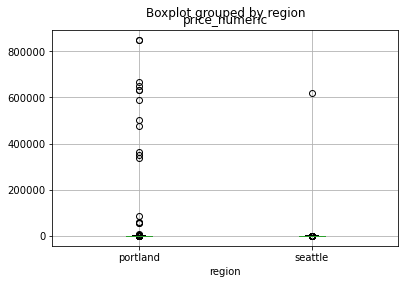

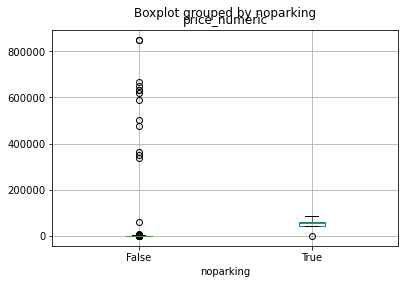

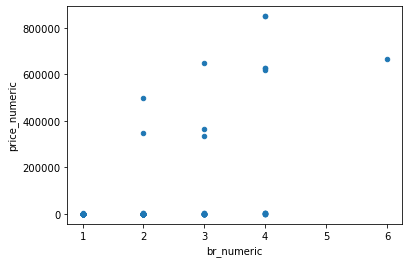

In [42]:
# your code here
    
### BEGIN SOLUTION
# This is the same code as above
# with the addition of the region field

df1 = getPosts('seattle')
df2 = getPosts('portland')
df = pd.concat([df1, df2])

# if you want to be fancy, we could have done this in a single line using a list comprehension
#df = pd.concat([getPosts(city) for city in ['seattle', 'portland']])

# you might have already done this above
df['price_numeric'] = df.price.str.replace('$','').str.replace(',','').astype(float)
df['br_numeric'] = df.bedrooms.astype(float)

df.boxplot('price_numeric', by='region')
df.boxplot('price_numeric', by='noparking')
df.plot('br_numeric','price_numeric', kind= 'scatter')

### END SOLUTION

Reflect on this assignment. What did you find most challenging? What problems did you encounter? How might you have gone about it differently the next time? (Write a few bullet points in a markdown cell.)

To help me calibrate future assignments, please also indicate about how long it took you to complete.

# Challenge Problem
Remember, you need to do at least two of these challenge problems each quarter.

For a single city, create a dataframe of the first 1200 posts. *Hint: you'll need to loop over pages, and figure out what the URL is for the second and subsequent page of results.*

Clean up the `neighborhood` field so that the names are relatively consistent (e.g. you'll want to change Ktown to Koreatown). Plot the rents by neighborhood (e.g. in a boxplot).

Add the latitude and longitude to the dataframe. Convert it to a `point` in `geopandas`, and map your points, perhaps with the color or size of the point indicating the price of each apartment. [Advice on how to do this is here](https://geopandas.org/gallery/create_geopandas_from_pandas.html).

                                                                               


In [44]:
# Your answer here